In [2]:
#!pip install xgboost

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier() 

from sklearn.tree import DecisionTreeClassifier

d = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier

k = KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB

g = GaussianNB()

b = BernoulliNB()

from xgboost import XGBClassifier

xgbc = XGBClassifier()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv("ttrain.csv")

In [3]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df2 = pd.read_csv("ttest.csv")

In [5]:
df = df1.append(df2)

In [6]:
df.shape


(1309, 12)

In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
332,333,0.0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
133,134,1.0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
671,672,0.0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
723,724,0.0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
656,657,0.0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
377,378,0.0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
155,1047,NaN,3,"Duquemin, Mr. Joseph",male,24.0,0,0,S.O./P.P. 752,7.5500,NaN,S
45,46,0.0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
346,1238,NaN,2,"Botsford, Mr. William Hull",male,26.0,0,0,237670,13.0000,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# __Titanic Verisindeki Boşlukları Doldurma__

__Embraked__

In [10]:
df.Embarked.value_counts()         

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
df["Embarked"] = df["Embarked"].fillna("S")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

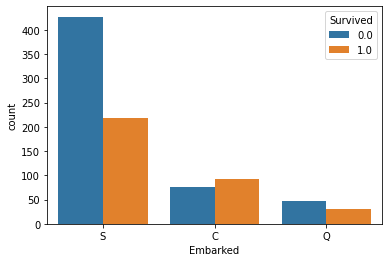

In [12]:
sns.countplot(x = "Embarked" , hue = "Survived" , data = df)

In [13]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

__Age__

In [14]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)
df["Title"].value_counts()                                             

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [15]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"] = df["Title"].replace(["Ms","Mlle"] , "miss")
df["Title"] = df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs") # evli kadın
df["Title"] = df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr")

In [16]:
df["Title"].value_counts()  

Mr        783
Miss      260
Mrs       201
Master     61
miss        4
Name: Title, dtype: int64

In [17]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)
df.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Title             0
dtype: int64

__Cabin__

In [18]:
del df["Cabin"] #verini %80'i boş o yüzden sileriz

__Fare__

In [19]:
df["Fare"].fillna(df["Fare"].mean() , inplace = True)

In [20]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

__Diğer__

In [21]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1 # sibsip ve parch ve kişinin kendisini ekleriz
df.FamilySize.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1


In [23]:
df.drop(["PassengerId","Ticket" ,"Fare" ,"Name"] ,axis = 1,inplace = True )

In [24]:
#df.to_csv('titanic_last.csv', index=False)

In [31]:
df_dum = pd.get_dummies(df , drop_first = True)

In [32]:
df_dum.shape

(1309, 13)

In [33]:
df_dum.head()

,Survived,Pclass,Age,SibSp,Parch,FamilySize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_miss
0,0.0,3,22.0,1,0,2,1,0,1,0,1,0,0
1,1.0,1,38.0,1,0,2,0,0,0,0,0,1,0
2,1.0,3,26.0,0,0,1,0,0,1,1,0,0,0
3,1.0,1,35.0,1,0,2,0,0,1,0,0,1,0
4,0.0,3,35.0,0,0,1,1,0,1,0,1,0,0


In [34]:
df_train = df_dum[:891]
df_test = df_dum[891:]

In [35]:
df_train.shape , df_test.shape

((891, 13), (418, 13))

# Modelling

In [36]:
del df_train["Survived"]

In [37]:
y=df1["Survived"]

In [40]:
algorithms = [g,b,k,log,gbc,r,d,xgbc]
names = ['GaussianNB', 'BernoulliNB','K Nearest', 'Logistic', 'Gradient Boosting', 'RandomForest', 'Decision Tree',"XGBC"]


In [41]:

def algo_test(x, y, algorithms = algorithms, names = names):
    
    #fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x, y)
    
    accuracy = []
    precision = [] 
    recall = []
    f1 = []

    for i in range(len(algorithms)):

        accuracy.append(accuracy_score(y, algorithms[i].predict(x))) 
        precision.append(precision_score (y, algorithms[i].predict(x))) 
        recall.append(recall_score (y, algorithms[i].predict(x)))
        f1.append(f1_score (y, algorithms[i].predict(x))) 
        
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall',"F1"], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1 
    
    return metrics.sort_values('F1', ascending = False)



In [42]:
algo_test(df_train , y)

C:\Users\oztur\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy,Precision,Recall,F1
RandomForest,0.937149,0.952532,0.880117,0.914894
Decision Tree,0.937149,0.967320,0.865497,0.913580
XGBC,0.918070,0.949833,0.830409,0.886115
Gradient Boosting,0.882155,0.893688,0.786550,0.836703
K Nearest,0.838384,0.811321,0.754386,0.781818
Logistic,0.831650,0.798137,0.751462,0.774096
GaussianNB,0.800224,0.788732,0.654971,0.715655
BernoulliNB,0.785634,0.735202,0.690058,0.711916


In [36]:
del df_test["Survived"]

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   FamilySize  418 non-null    int64  
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
 8   Title_Miss  418 non-null    uint8  
 9   Title_Mr    418 non-null    uint8  
 10  Title_Mrs   418 non-null    uint8  
 11  Title_miss  418 non-null    uint8  
dtypes: float64(1), int64(4), uint8(7)
memory usage: 22.5 KB


In [38]:
tahmin = r.predict(df_test)
tahmin

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [39]:
final = df2[["PassengerId"]]
final["Survived"] = tahmin

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [41]:
final.to_csv("final_titanic.csv" , index = False)